In [27]:
import numpy as np
import pandas as pd
from pylab import *
from sklearn import svm

In [34]:
dataset = pd.read_excel('./BreastTissue.xls','Data')
dataset.head()

,Case #,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,3,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [35]:
dataset.describe()

,Case #,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,53.500000,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,30.743563,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,1.000000,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,27.250000,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,53.500000,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,79.750000,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,106.000000,2800.000000,0.358316,0.467748,1063.441427,174480.476218,164.071543,436.099640,977.552367,2896.582483


In [36]:
dataset.drop(dataset.columns[0],inplace=True,axis=1)
dataset.head()

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [37]:
# different type of breast cancer
dataset.Class.unique()

array(['car', 'fad', 'mas', 'gla', 'con', 'adi'], dtype=object)

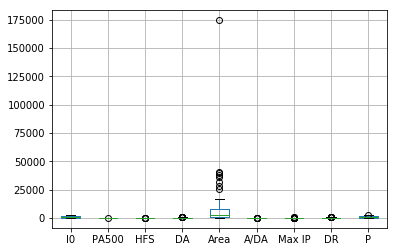

In [38]:
fig = dataset.boxplot()
# fig.figure

In [39]:
print (dataset.columns.values[1:])
for name in dataset.columns.values[1:]:
    Q1 = dataset[name].quantile(0.25)
    Q3 = dataset[name].quantile(0.75)
    IQR = Q3 - Q1
    mask = (dataset[name] < (Q1 - 1.5 * IQR)) | (dataset[name] > (Q3 + 1.5 * IQR))
    dataset.loc[mask,[name]] = np.nan

['I0' 'PA500' 'HFS' 'DA' 'Area' 'A/DA' 'Max IP' 'DR' 'P']


In [40]:
dataset.describe()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,105.000000,102.000000,99.000000,98.000000,101.000000,95.000000,99.000000,105.000000
mean,784.251618,0.117864,0.103145,155.127909,3724.337564,19.786807,52.331548,131.803170,790.771991
std,753.950075,0.064807,0.083831,133.964402,4359.496549,14.846681,36.319006,122.952680,738.620125
min,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,250.000000,0.067195,0.042761,50.845281,367.293098,7.556963,25.878665,36.683776,267.517446
50%,384.936489,0.104720,0.084823,100.788080,1386.534866,15.670203,37.384724,86.576561,445.513299
75%,1487.989626,0.165806,0.160221,224.047865,5672.499772,27.824923,70.876186,198.789606,1197.762150
max,2800.000000,0.317824,0.297404,555.352318,16640.723619,63.651988,160.065460,501.038494,2686.435346


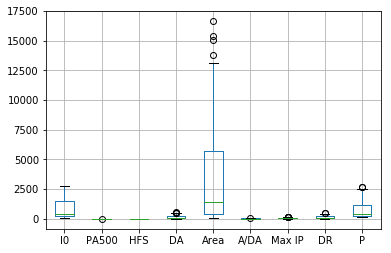

In [41]:
plt.cla()
fig = dataset.boxplot()
# fig.figure

In [42]:
dataset.describe()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,105.000000,102.000000,99.000000,98.000000,101.000000,95.000000,99.000000,105.000000
mean,784.251618,0.117864,0.103145,155.127909,3724.337564,19.786807,52.331548,131.803170,790.771991
std,753.950075,0.064807,0.083831,133.964402,4359.496549,14.846681,36.319006,122.952680,738.620125
min,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,250.000000,0.067195,0.042761,50.845281,367.293098,7.556963,25.878665,36.683776,267.517446
50%,384.936489,0.104720,0.084823,100.788080,1386.534866,15.670203,37.384724,86.576561,445.513299
75%,1487.989626,0.165806,0.160221,224.047865,5672.499772,27.824923,70.876186,198.789606,1197.762150
max,2800.000000,0.317824,0.297404,555.352318,16640.723619,63.651988,160.065460,501.038494,2686.435346


In [43]:
dataset = dataset.interpolate()
dataset.isnull().sum()

Class     0
I0        0
PA500     0
HFS       0
DA        0
Area      0
A/DA      0
Max IP    0
DR        0
P         0
dtype: int64

In [44]:
from sklearn import svm
from sklearn.utils import shuffle
clf = svm.SVC(kernel='linear')
dataset.sample(frac=1).reset_index(drop=True)
dataset = shuffle(dataset)
X = dataset.iloc[:80,1:].copy().reset_index(drop=True)
y = dataset.iloc[:80,0].copy().reset_index(drop=True)
clf.fit(X, y)
total = float(len(range(80,106)))
correct = 0.0
for i in list(range(80,106)):
    print("Prediction: ",clf.predict([dataset.iloc[i,1:]])[0], "Actual: ",dataset.iloc[i,0])
    if clf.predict([dataset.iloc[i,1:]])[0] == dataset.iloc[i,0]:
        correct += 1.0
print ("\n Accuracy = ",(correct/total)*100.0)
    

Prediction:  mas Actual:  mas
Prediction:  adi Actual:  adi
Prediction:  gla Actual:  mas
Prediction:  adi Actual:  con
Prediction:  adi Actual:  adi
Prediction:  car Actual:  car
Prediction:  gla Actual:  mas
Prediction:  mas Actual:  car
Prediction:  adi Actual:  adi
Prediction:  adi Actual:  adi
Prediction:  fad Actual:  gla
Prediction:  gla Actual:  gla
Prediction:  car Actual:  car
Prediction:  fad Actual:  fad
Prediction:  fad Actual:  fad
Prediction:  gla Actual:  gla
Prediction:  fad Actual:  mas
Prediction:  adi Actual:  adi
Prediction:  car Actual:  mas
Prediction:  adi Actual:  adi
Prediction:  gla Actual:  gla
Prediction:  fad Actual:  fad
Prediction:  car Actual:  car
Prediction:  adi Actual:  adi
Prediction:  con Actual:  con
Prediction:  gla Actual:  gla

 Accuracy =  73.07692307692307


In [45]:
dataset.Class.unique()

array(['adi', 'con', 'fad', 'car', 'gla', 'mas'], dtype=object)

In [46]:
for name in dataset.Class.unique():
    print (name, dataset.loc[dataset.Class==name,"Class"].count())

adi 22
con 14
fad 15
car 21
gla 16
mas 18
